In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib import rcParams
from scipy.optimize import curve_fit
from cycler import cycler
from matplotlib.patches import Rectangle

In [255]:
plt.rcdefaults()

# axes
rcParams['axes.grid'] = True
rcParams['axes.grid.axis'] = 'both'
rcParams['axes.axisbelow'] = True
rcParams['axes.prop_cycle'] = cycler('color', ['teal', 'firebrick', 'darkgoldenrod', 'navy', 'olive', 'darkorchid', 'slategray', 'mediumvioletred', 'saddlebrown', 'black'])

# figure:
rcParams['figure.autolayout'] = True
rcParams['figure.dpi'] = 100
rcParams['figure.figsize'] = [7.4, 4.8]


# fontsizes
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 12
rcParams['legend.title_fontsize'] = 12
rcParams['axes.labelsize'] = 16
# rcParams['axes.title.size'] = 16

rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'

# legend
# rcParams['legend.framealpha'] = 1
rcParams['legend.fancybox'] = False
rcParams['legend.edgecolor'] = 'gray'


# save
rcParams['savefig.bbox'] = 'tight'

In [256]:
# extracción de datos
data = pd.read_csv('Mediciones/2 vortices separados 5.5 cm sentido contrario verde y rojo.txt', header = 0, names = ['x', 'y', 'u', 'v', 'tipo'], dtype = {'x': np.float64, 'y': np.float64, 'u': np.float64, 'v': np.float64, 'tipo': np.int32})
x, y, u, v, tipo = np.array(data['x'])*100, np.array(data['y'])*100, np.array(data['u'])*100, np.array(data['v'])*100, np.array(data['tipo']) # u = v_x, v = v_y

Text(0, 0.5, '$v_x$')

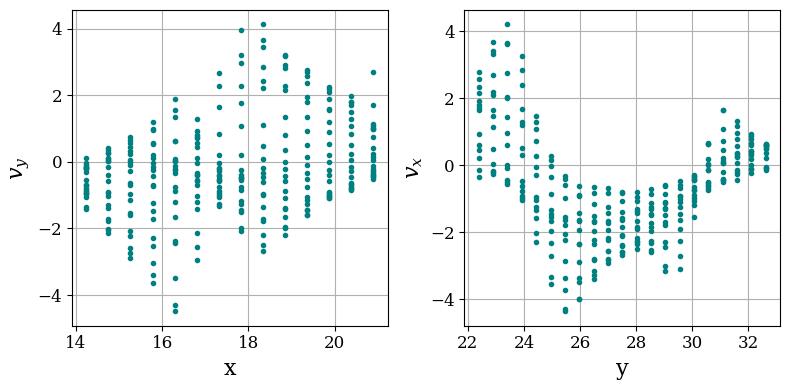

In [257]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(x, v, '.')
ax1.set_xlabel('x')
ax1.set_ylabel(r'$v_y$')
ax2.plot(y, u, '.')
ax2.set_xlabel('y')
ax2.set_ylabel(r'$v_x$')

In [258]:
# cálculo de la línea de velocidad en y = 0

valores_x = [x[0]] # tira de valores discretos de x
indices_x = [0]
for i in range(len(x)):
    if x[i] != valores_x[-1]:
        indices_x.append(np.nonzero(x == x[i])[0][0])
        valores_x.append(x[i])

valores_v = [np.array([]) for i in range(len(valores_x))] # lista con arrays de v_y para cada y sobre los x discretizados 
for n in range(len(valores_x)-1):
    tramo = v[indices_x[n]:indices_x[n+1]]
    valores_v[n] = np.append(valores_v[n], tramo)
valores_v[-1] = np.append(valores_v[-1], v[indices_x[-1]:])

vmin = [] # velocidad en y mínima sobre cada valor discreto de x
indices_vmin = [] # índice de cada vmin obtenido en el array "general" v
for n in range(len(valores_x)-1):
    tramo = np.abs(valores_v[n])
    minimo = np.min(tramo)
    indice_min = np.nonzero(tramo == minimo)[0][0] + indices_x[n]
    indices_vmin.append(indice_min)
    vmin = np.append(vmin, minimo)
ult_tramo = np.abs(v[indices_x[-1]:])
ult_min = np.min(ult_tramo)
vmin = np.append(vmin, ult_min)
ult_i = np.nonzero(ult_tramo == ult_min)[0][0] + indices_x[-1]
indices_vmin.append(ult_i)

y_vel0 = [y[i] for i in indices_vmin] # posición en y de las vmin
yf = np.mean(y_vel0) # y promedio de la velocidad mínima en y (la línea de vel y = 0 teórica) 
err_yf = np.std(y_vel0)/np.sqrt(len(y_vel0))
print(f'el valor de y para el cual la velocidad en y es mínima a lo largo de x es {yf} cm (sin cambiar el origen)')


el valor de y para el cual la velocidad en y es mínima a lo largo de x es 28.12212641857142 cm (sin cambiar el origen)


In [259]:
valores_y = np.array([y[0]]) # valores discretizados de y
for i in range(len(y)):
    if y[i] not in valores_y:
        valores_y = np.append(valores_y, y[i])
valores_y.sort()

valores_u = [np.array([]) for i in range(len(valores_y))] # lista con arrays de v_x para cada x sobre los y discretizados 
for i, val_y in enumerate(y):
    ind = np.nonzero(valores_y == val_y)[0][0]
    valores_u[ind] = np.append(valores_u[ind], u[i])

yf2 = valores_y[np.abs(valores_y - yf).argmin()] # valor de y discreto más cercano a la línea calculada yf 

u_uso = valores_u[np.abs(valores_y - yf).argmin()] # v_x sobre el y discreto más cercano a yf
xf = valores_x[np.abs(u_uso).argmax()] # x donde está la máxima v_x sobre yf (sobre la línea horizontal con v_y = 0)
v_xf = np.min(u_uso)

v_sobre_yf2 = np.abs(np.array([val_v[np.abs(valores_y - yf).argmin()] for val_v in valores_v])) # 
v_sobre_yf2_mean = np.mean(v_sobre_yf2)

err_v_sobre_yf2 = np.std(v_sobre_yf2)/np.sqrt(len(v_sobre_yf2))

In [260]:
# cálculo de los centros de los vórtices

# separo los datos en función de si están arriba o abajo de la línea (uso yf2)
corte = np.nonzero(valores_y==yf2)[0][0]

# VORTICE DE ABAJO (1)
y1 = valores_y[:corte]
u1 = valores_u[:corte]

x1 = valores_x
v1 = [val_v[:corte] for val_v in valores_v]

# centro x
v_mean = np.array([np.mean(v1[n]) for n in range(len(x1))])
v_abs = np.abs(v_mean)
min_v = v_mean[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]]
x01 = x1[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]]

# centro y
u_mean = np.array([np.mean(l) for l in u1])
u_abs = np.abs(u_mean)
min_u = u_mean[np.where(u_abs == np.min(u_abs[len(u_abs)//3:2*len(u_abs)//3]))[0][0]]
y01 = y1[np.where(u_abs == np.min(u_abs[len(u_abs)//3:2*len(u_abs)//3]))[0][0]]


# fig1, (ax1, ax2) = plt.subplots(2, 1)
# # ax1.plot(y, u, '.')
# ax1.plot(x1, v_mean, '.')
# ax1.plot(x01, min_v, '.')
# ax2.plot(y1, u_mean, '.')
# ax2.plot(y01, min_u, '.')
# ax1.set_xlabel('x')
# ax1.set_ylabel(r'$\langle v_y \rangle$')
# ax2.set_xlabel('y')
# ax2.set_ylabel(r'$\langle v_x \rangle$')


In [261]:
# VORTICE DE ARRIBA (2)
y2 = valores_y[corte:]
u2 = valores_u[corte:]

x2 = valores_x
v2 = [val_v[corte:] for val_v in valores_v]

# centro x
v_mean = np.array([np.mean(v2[n]) for n in range(len(x2))])
v_abs = np.abs(v_mean)
min_v = v_mean[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]]
x02 = x2[np.where(v_abs == np.min(v_abs[len(v_abs)//3:2*len(v_abs)//3]))[0][0]]

# centro y
u_mean = np.array([np.mean(l) for l in u2])
u_abs = np.abs(u_mean)
min_u = u_mean[np.where(u_abs == np.min(u_abs[len(u_abs)//3:2*len(u_abs)//3]))[0][0]]
y02 = y2[np.where(u_abs == np.min(u_abs[len(u_abs)//3:2*len(u_abs)//3]))[0][0]]


# fig1, (ax1, ax2) = plt.subplots(2, 1)
# # ax1.plot(y, u, '.')
# ax1.plot(x2, v_mean, '.')
# # ax1.plot(x2[len(x2)//3:2*len(x2)//3], v_mean[len(v_mean)//3:2*len(v_mean)//3], '.')
# ax1.plot(x02, min_v, '.')
# ax2.plot(y2, u_mean, '.')
# # ax2.plot(y2[len(y2)//3:2*len(y2)//3], u_mean[len(u_mean)//3:2*len(u_mean)//3], '.')
# ax2.plot(y02, min_u, '.')
# ax1.set_xlabel('x')
# ax1.set_ylabel(r'$\langle v_y \rangle$')
# ax2.set_xlabel('y')
# ax2.set_ylabel(r'$\langle v_x \rangle$')

In [262]:
# definición del origen:

y0 = (y02+y01)/2
x0 = (x02+x01)/2

In [263]:
# traslado todo lo calculado hasta ahora:
x = x - x0
y = y - y0

x01 = x01 - x0
y01 = y01 - y0
x02 = x02 - x0
y02 = y02 - y0

xf = xf - x0
yf = yf - y0
yf2 = yf2 - y0

In [267]:
# Datos cuantitativos que es interesante levantar:
print(f'Línea horizontal (promedio) de velocidad en y mínima: ({yf} +- {err_yf}) cm')
print(f'Línea horizontal (discreta) de velocidad en y mínima: {yf2}')
print(f'Promedio del módulo de la velocidad en y sobre esa línea: ({v_sobre_yf2_mean} +- {err_v_sobre_yf2}) cm/s')
print(f'Punto con máxima velocidad en x sobre la línea de mínima velocidad en y: {(xf, yf2)}')
print(f'Velocidad en x ese punto: {v_xf} cm/s')

Línea horizontal (promedio) de velocidad en y mínima: (0.620575353571418 +- 0.6832842791817336) cm
Línea horizontal (discreta) de velocidad en y mínima: 0.5110613950000022
Módulo de la velocidad en y promedio sobre esa línea: (0.3409215964214286 +- 0.03119665207496267) cm/s
Punto con máxima velocidad en x sobre la línea de mínima velocidad en y: (0.7665932200000007, 0.5110613950000022)
Velocidad en x ese punto: -2.505424432 cm/s


Text(0, 0.5, 'y')

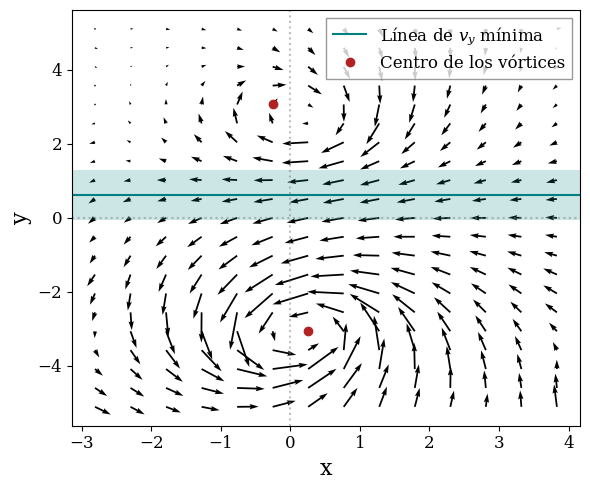

In [266]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.grid(False)
ax.axvline(0, linestyle='dotted', color='gray', alpha=0.5)
ax.axhline(0, linestyle='dotted', color='gray', alpha=0.5)
Q = ax.quiver(x, y, u, v)
ax.axhline(yf, label=r'Línea de $v_y$ mínima')

# esto ultimo no sé si tiene tanto sentido graficarlo pero lo dejo y lo charlamos
# ax.plot(xf, yf2, 'o', color='darkgoldenrod', label=r'Punto más cercano a $y_F$ con $v_x$ máxima')

ax.plot([x01, x02], [y01, y02], 'o', label='Centro de los vórtices', color='firebrick')
ax.add_patch(Rectangle((ax.get_xlim()[0],yf - err_yf), ax.get_xlim()[1] - ax.get_xlim()[0], 2*err_yf, alpha = 0.2))
ax.legend(loc='upper right')
ax.set_xlabel('x')
ax.set_ylabel('y')